In [41]:
from ACO_Hypercube_PreDetermined_Random import run_ants_on_hypercube_random_colors #  returns ((ant.number, path_length), iter)
import matplotlib.pyplot as plt
import time
import statistics

In [42]:
num_points = 300
iter_list = []
path_len_list = []
ant_winner_list = []
tic = time.time()
for iter in range(num_points):
    ((ant_winner, path_len), iter) = run_ants_on_hypercube_random_colors(6, 3, False, True)
    iter_list.append(iter)
    path_len_list.append(path_len)
    ant_winner_list.append(ant_winner)
toc = time.time()
print("Time taken to run is:", toc - tic, "seconds" )

Time taken to run is: 4.090955018997192 seconds


median iterations: 17.0
mean iterations: 28.513333333333332


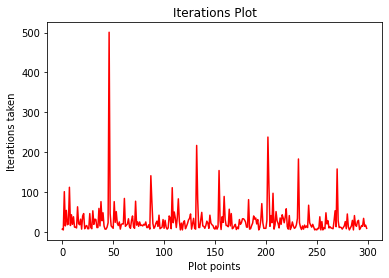

In [43]:
# Plot iterations
plt.plot([i for i in range(num_points)], iter_list, color="red")
plt.title("Iterations Plot")
plt.xlabel("Plot points")
plt.ylabel("Iterations taken")
print(f"median iterations: {statistics.median(iter_list)}")
print(f"mean iterations: {statistics.mean(iter_list)}")
plt.show()

median path_length: 11.0 nodes
mean path_length: 12.89 nodes


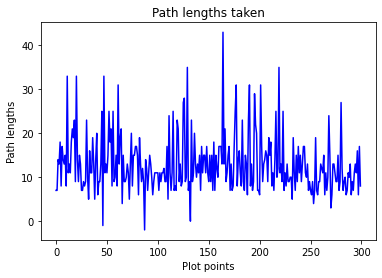

In [44]:
#Plot path lengths
plt.plot([i for i in range(num_points)], path_len_list, color="blue")
plt.title("Path lengths taken")
plt.xlabel("Plot points")
plt.ylabel("Path lengths")
print(f"median path_length: {statistics.median(path_len_list)} nodes")
print(f"mean path_length: {statistics.mean(path_len_list)} nodes")
plt.show()

median ant_winner: 3.0
mean ant_winner: 2.9966666666666666


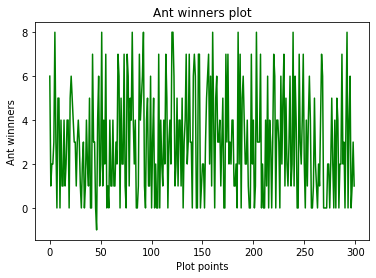

In [45]:
#Plot ant_winners
plt.plot([i for i in range(num_points)], ant_winner_list, color="green")
plt.title("Ant winners plot")
plt.xlabel("Plot points")
plt.ylabel("Ant winnners")
print(f"median ant_winner: {statistics.median(ant_winner_list)}")
print(f"mean ant_winner: {statistics.mean(ant_winner_list)}")
plt.show()